<a href="https://colab.research.google.com/github/PIYAL-DATTA/Multi-attack/blob/main/Bot_IoT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **lib**

In [ ]:
import os
import numpy as np
import pandas as pd
import gc
import kagglehub
import warnings
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, IsolationForest
# Libraries for Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
from scipy.stats import skew
sns.set(style="white", font_scale=1.5)
sns.set(rc={"axes.facecolor":"#FFFAF0", "figure.facecolor":"#FFFAF0"})
sns.set_context("poster", font_scale=.7)
import matplotlib.ticker as ticker

# Libraries to Handle Warnings
import warnings
warnings.filterwarnings('ignore')

# Libraries for Statistical Analysis
from scipy import stats
from scipy.stats import chi2, chi2_contingency

# Setting Display Options
pd.set_option("display.max.columns", None)

# Machine Learning Algorithms
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
import joblib


import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout,LeakyReLU
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.regularizers import l1,l2
from tensorflow.keras.optimizers import SGD
import keras_tuner

# Model Evaluation Metrics
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,silhouette_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Conv2D, MaxPooling2D

C:\Users\Piyal\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# **Bot_IoT Dataprocessing**

In [ ]:
# Download latest version
directory = kagglehub.dataset_download("vigneshvenkateswaran/bot-iot")

print("Path to dataset files:", directory)

Path to dataset files: C:\Users\Piyal\.cache\kagglehub\datasets\vigneshvenkateswaran\bot-iot\versions\1


In [ ]:
path_list = []
for dirname, _, filenames in os.walk(directory):
    for filename in filenames:
        data_file = os.path.join(dirname, filename)
        path_list.append(data_file)

for path in path_list:
  print(path)

C:\Users\Piyal\.cache\kagglehub\datasets\vigneshvenkateswaran\bot-iot\versions\1\data_1.csv
C:\Users\Piyal\.cache\kagglehub\datasets\vigneshvenkateswaran\bot-iot\versions\1\data_10.csv
C:\Users\Piyal\.cache\kagglehub\datasets\vigneshvenkateswaran\bot-iot\versions\1\data_11.csv
C:\Users\Piyal\.cache\kagglehub\datasets\vigneshvenkateswaran\bot-iot\versions\1\data_12.csv
C:\Users\Piyal\.cache\kagglehub\datasets\vigneshvenkateswaran\bot-iot\versions\1\data_13.csv
C:\Users\Piyal\.cache\kagglehub\datasets\vigneshvenkateswaran\bot-iot\versions\1\data_14.csv
C:\Users\Piyal\.cache\kagglehub\datasets\vigneshvenkateswaran\bot-iot\versions\1\data_15.csv
C:\Users\Piyal\.cache\kagglehub\datasets\vigneshvenkateswaran\bot-iot\versions\1\data_16.csv
C:\Users\Piyal\.cache\kagglehub\datasets\vigneshvenkateswaran\bot-iot\versions\1\data_17.csv
C:\Users\Piyal\.cache\kagglehub\datasets\vigneshvenkateswaran\bot-iot\versions\1\data_18.csv
C:\Users\Piyal\.cache\kagglehub\datasets\vigneshvenkateswaran\bot-iot\v

In [ ]:
data = [] # Initialize an empty list to store DataFrames

for path in path_list:
  # Skip the data_names.csv file
  if "data_names.csv" not in path:
    temp_df = pd.read_csv(path)
    filtered_df = temp_df[(temp_df['category'] == 'DDoS') | (temp_df['category'] == 'DoS')]
    if not filtered_df.empty:
      data.append(filtered_df)
    del temp_df
    del filtered_df
    gc.collect()

In [ ]:
# Concatenate all dataframes in the list
df = pd.concat(data, ignore_index=True)
data.clear() # Clear the list to free up memory
display(df.head())

,pkSeqID,stime,flgs,proto,saddr,sport,daddr,dport,pkts,bytes,state,ltime,seq,dur,mean,stddev,smac,dmac,sum,min,max,soui,doui,sco,dco,spkts,dpkts,sbytes,dbytes,rate,srate,drate,attack,category,subcategory
0,9000001,1.528083e+09,e s,tcp,192.168.100.150,5712.0,192.168.100.6,80.0,4,616,REQ,1.528083e+09,8179,58.922619,0.000000,0.000000,NaN,NaN,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,4,0,616,0,0.050914,0.050914,0.000000,1,DoS,TCP
1,9000002,1.528083e+09,e s,tcp,192.168.100.150,5713.0,192.168.100.6,80.0,4,616,REQ,1.528083e+09,8180,58.922619,0.000000,0.000000,NaN,NaN,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,4,0,616,0,0.050914,0.050914,0.000000,1,DoS,TCP
2,9000003,1.528083e+09,e s,tcp,192.168.100.150,5594.0,192.168.100.6,80.0,6,736,RST,1.528083e+09,8181,58.960598,0.019105,0.019106,NaN,NaN,0.076421,0.0,0.038441,NaN,NaN,NaN,NaN,4,2,616,120,0.084802,0.050914,0.016972,1,DoS,TCP
3,9000004,1.528083e+09,e s,tcp,192.168.100.150,5595.0,192.168.100.6,80.0,6,736,RST,1.528083e+09,8182,58.960598,0.019105,0.019106,NaN,NaN,0.076421,0.0,0.038442,NaN,NaN,NaN,NaN,4,2,616,120,0.084802,0.050914,0.016972,1,DoS,TCP
4,9000005,1.528083e+09,e s,tcp,192.168.100.150,5598.0,192.168.100.6,80.0,6,736,RST,1.528083e+09,8183,58.960598,0.020454,0.020559,NaN,NaN,0.081817,0.0,0.043839,NaN,NaN,NaN,NaN,4,2,616,120,0.084802,0.050914,0.016973,1,DoS,TCP


In [ ]:
df.shape

(71537674, 35)

In [ ]:
DropCol_df = df.drop(['pkSeqID', 'flgs', 'saddr', 'sport', 'daddr', 'dport', 'seq', 'stddev', 'smac', 'dmac', 'sum', 'min', 'max', 'rate', 'srate', 'drate', 'soui', 'doui', 'sco', 'dco', 'attack', 'subcategory '], axis=1)

In [ ]:
del df
gc.collect()
DropCol_df.shape

(71537674, 13)

In [ ]:
NoDup_df = DropCol_df.drop_duplicates()
del DropCol_df
gc.collect()
NoDup_df.shape

(64789400, 13)

In [ ]:
DDoS_df = NoDup_df[(NoDup_df['category'] == 'DDoS')]
DDoS_df.shape

(35431514, 13)

In [ ]:
DoS_df = NoDup_df[(NoDup_df['category'] == 'DoS')]
DoS_df.shape

del NoDup_df
gc.collect()

0

In [ ]:
DDoS_df = DDoS_df.iloc[0:25000]
DDoS_df.shape

(25000, 13)

In [ ]:
DoS_df = DoS_df.iloc[0:25000]
DoS_df.shape

(25000, 13)

In [ ]:
DDoS_Dos_df = pd.concat([DDoS_df, DoS_df], ignore_index=True)
DDoS_Dos_df.shape

del DDoS_df
del DoS_df
gc.collect()

0

In [ ]:
DDoS_Dos_df.columns

Index(['stime', 'proto', 'pkts', 'bytes', 'state', 'ltime', 'dur', 'mean',
       'spkts', 'dpkts', 'sbytes', 'dbytes', 'category'],
      dtype='object')

*Featutre Engineering*

In [ ]:
def generate_features(df):
  df['byte_ratio'] = df['sbytes'] / (df['dbytes'] + 1)
  df['pkt_ratio'] = df['spkts'] / (df['dpkts'] + 1)

  df['byte_pkt_interaction_src'] = df['sbytes'] * df['spkts']
  df['byte_pkt_interaction_dst'] = df['dbytes'] * df['dpkts']
  df['byte_pkt_interaction'] = df['bytes'] * df['pkts']

  df['pkts_per_second'] = (df['pkts']/ (df['dur'] + 0.001))
  df['bytes_per_second'] = (df['bytes']/ (df['dur'] + 0.001))

  df['mean'] = (df['bytes'] / (df['pkts']))
  df['smean'] = (df['sbytes'] / (df['spkts']))
  df['dmean'] = (df['dbytes'] / (df['dpkts']))

  df['spkts_per_second'] = (df['spkts']/ (df['stime'] + 0.001))
  df['dpkts_per_second'] = (df['dpkts']/ (df['ltime'] + 0.001))
  df['sbytes_per_second'] = (df['sbytes']/ (df['stime'] + 0.001))
  df['dbytes_per_second'] = (df['dbytes']/ (df['ltime'] + 0.001))

  return df

# generate_features(train_df)
DDoS_Dos_df = generate_features(DDoS_Dos_df)
print(DDoS_Dos_df.shape)
DDoS_Dos_df.columns

(50000, 26)


Index(['stime', 'proto', 'pkts', 'bytes', 'state', 'ltime', 'dur', 'mean',
       'spkts', 'dpkts', 'sbytes', 'dbytes', 'category', 'byte_ratio',
       'pkt_ratio', 'byte_pkt_interaction_src', 'byte_pkt_interaction_dst',
       'byte_pkt_interaction', 'pkts_per_second', 'bytes_per_second', 'smean',
       'dmean', 'spkts_per_second', 'dpkts_per_second', 'sbytes_per_second',
       'dbytes_per_second'],
      dtype='object')

In [ ]:
DDoS_Dos_df.rename(columns={'category': 'attack_cat'}, inplace=True)

In [ ]:
DDoS_Dos_df.columns

Index(['stime', 'proto', 'pkts', 'bytes', 'state', 'ltime', 'dur', 'mean',
       'spkts', 'dpkts', 'sbytes', 'dbytes', 'attack_cat', 'byte_ratio',
       'pkt_ratio', 'byte_pkt_interaction_src', 'byte_pkt_interaction_dst',
       'byte_pkt_interaction', 'pkts_per_second', 'bytes_per_second', 'smean',
       'dmean', 'spkts_per_second', 'dpkts_per_second', 'sbytes_per_second',
       'dbytes_per_second'],
      dtype='object')

# **UNSW_NB15 Dataprocessing**

In [ ]:
# Libraries to Handle Warnings
warnings.filterwarnings('ignore')

In [ ]:
# Data Source
path = kagglehub.dataset_download("mrwellsdavid/unsw-nb15")
print("Path to dataset files:", path)

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Path to dataset files: C:\Users\Piyal\.cache\kagglehub\datasets\mrwellsdavid\unsw-nb15\versions\1


In [ ]:
dataset_path = path # Use the path variable from the previous cell
LIST_EVENTS = pd.read_csv(os.path.join(dataset_path, 'UNSW-NB15_LIST_EVENTS.csv'), encoding='cp1252')
NB15_1 = pd.read_csv(os.path.join(dataset_path, 'UNSW-NB15_1.csv'), encoding='cp1252')
NB15_2 = pd.read_csv(os.path.join(dataset_path, 'UNSW-NB15_2.csv'), encoding='cp1252')
NB15_3 = pd.read_csv(os.path.join(dataset_path, 'UNSW-NB15_3.csv'), encoding='cp1252')
NB15_4 = pd.read_csv(os.path.join(dataset_path, 'UNSW-NB15_4.csv'), encoding='cp1252')
NB15_features = pd.read_csv(os.path.join(dataset_path, 'NUSW-NB15_features.csv'), encoding='cp1252')

In [ ]:
# Naming Col
NB15_1.columns = NB15_features['Name']
NB15_2.columns = NB15_features['Name']
NB15_3.columns = NB15_features['Name']
NB15_4.columns = NB15_features['Name']

train_df = pd.concat([NB15_1, NB15_2, NB15_3, NB15_4], ignore_index=True)

# Shuffle the data points in train_df
train_df = train_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
# Droping Duplicate
train_df = train_df.drop_duplicates()
train_df.columns

Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes',
       'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload',
       'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime',
       'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat',
       'Label'],
      dtype='object', name='Name')

In [ ]:
col_list =[
    'Stime', 'proto', 'state', 'Ltime', 'dur',
      'Spkts', 'Dpkts', 'sbytes', 'dbytes', 'attack_cat'
]
train_df = train_df[col_list]
train_df.shape

(2059417, 10)

In [ ]:
train_df['attack_cat'].fillna('normal',inplace = True)
train_df['attack_cat'] = train_df['attack_cat'].apply(lambda x: x.strip().lower())

In [ ]:
train_df.rename(columns={'Stime': 'stime', 'Ltime': 'ltime', 'Spkts': 'spkts', 'Dpkts': 'dpkts'}, inplace=True)

In [ ]:
train_df.columns

Index(['stime', 'proto', 'state', 'ltime', 'dur', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'attack_cat'],
      dtype='object', name='Name')

*Featutre Engineering*

In [ ]:
def generate_features(df):
  df['byte_ratio'] = df['sbytes'] / (df['dbytes'] + 1)
  df['pkt_ratio'] = df['spkts'] / (df['dpkts'] + 1)

  df['bytes'] = df['sbytes'] + df['dbytes']
  df['pkts'] = df['spkts'] + df['dpkts']

  df['byte_pkt_interaction_src'] = df['sbytes'] * df['spkts']
  df['byte_pkt_interaction_dst'] = df['dbytes'] * df['dpkts']
  df['byte_pkt_interaction'] = df['bytes'] * df['pkts']

  df['pkts_per_second'] = (df['pkts']/ (df['dur'] + 0.001))
  df['bytes_per_second'] = (df['bytes']/ (df['dur'] + 0.001))

  df['mean'] = (df['bytes'] / (df['pkts']))
  df['smean'] = (df['sbytes'] / (df['spkts']))
  df['dmean'] = (df['dbytes'] / (df['dpkts']))

  df['spkts_per_second'] = (df['spkts']/ (df['stime'] + 0.001))
  df['dpkts_per_second'] = (df['dpkts']/ (df['ltime'] + 0.001))
  df['sbytes_per_second'] = (df['sbytes']/ (df['stime'] + 0.001))
  df['dbytes_per_second'] = (df['dbytes']/ (df['ltime'] + 0.001))

  return df

# generate_features(train_df)
train_df = generate_features(train_df)
print(train_df.shape)
train_df.columns

(2059417, 26)


Index(['stime', 'proto', 'state', 'ltime', 'dur', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'attack_cat', 'byte_ratio', 'pkt_ratio', 'bytes', 'pkts',
       'byte_pkt_interaction_src', 'byte_pkt_interaction_dst',
       'byte_pkt_interaction', 'pkts_per_second', 'bytes_per_second', 'mean',
       'smean', 'dmean', 'spkts_per_second', 'dpkts_per_second',
       'sbytes_per_second', 'dbytes_per_second'],
      dtype='object', name='Name')

# **Merging both dataset**

In [ ]:
dataset = pd.concat([train_df, DDoS_Dos_df], ignore_index=True)
print(dataset.shape)
dataset.head()

(2109417, 26)


,stime,proto,state,ltime,dur,spkts,dpkts,sbytes,dbytes,attack_cat,byte_ratio,pkt_ratio,bytes,pkts,byte_pkt_interaction_src,byte_pkt_interaction_dst,byte_pkt_interaction,pkts_per_second,bytes_per_second,mean,smean,dmean,spkts_per_second,dpkts_per_second,sbytes_per_second,dbytes_per_second
0,1.424224e+09,tcp,CON,1.424224e+09,0.285356,6,2,986,86,normal,11.333333,2.000000,1072,8,5916,172,8576,27.937253,3743.591893,134.000000,164.333333,43.000000,4.212819e-09,1.404273e-09,6.923066e-07,6.038374e-08
1,1.424253e+09,tcp,FIN,1.424253e+09,0.314311,16,18,1540,1644,normal,0.936170,0.842105,3184,34,24640,29592,108256,107.830047,10097.966769,93.647059,96.250000,91.333333,1.123396e-08,1.263821e-08,1.081269e-06,1.154290e-06
2,1.421934e+09,udp,CON,1.421934e+09,0.301180,4,4,536,304,normal,1.757377,0.800000,840,8,2144,1216,6720,26.474287,2779.800119,105.000000,134.000000,76.000000,2.813069e-09,2.813069e-09,3.769513e-07,2.137933e-07
3,1.424253e+09,udp,INT,1.424253e+09,0.000009,2,0,114,0,generic,114.000000,2.000000,114,2,228,0,228,1982.160555,112983.151635,57.000000,57.000000,NaN,1.404245e-09,0.000000e+00,8.004198e-08,0.000000e+00
4,1.424244e+09,udp,CON,1.424244e+09,0.001079,2,2,146,178,normal,0.815642,0.666667,324,4,292,356,1296,1924.001924,155844.155844,81.000000,73.000000,89.000000,1.404254e-09,1.404254e-09,1.025105e-07,1.249786e-07


***NaN handling***

In [ ]:
dataset.fillna(0, inplace=True)
dataset.head()

,stime,proto,state,ltime,dur,spkts,dpkts,sbytes,dbytes,attack_cat,byte_ratio,pkt_ratio,bytes,pkts,byte_pkt_interaction_src,byte_pkt_interaction_dst,byte_pkt_interaction,pkts_per_second,bytes_per_second,mean,smean,dmean,spkts_per_second,dpkts_per_second,sbytes_per_second,dbytes_per_second
0,1.424224e+09,tcp,CON,1.424224e+09,0.285356,6,2,986,86,normal,11.333333,2.000000,1072,8,5916,172,8576,27.937253,3743.591893,134.000000,164.333333,43.000000,4.212819e-09,1.404273e-09,6.923066e-07,6.038374e-08
1,1.424253e+09,tcp,FIN,1.424253e+09,0.314311,16,18,1540,1644,normal,0.936170,0.842105,3184,34,24640,29592,108256,107.830047,10097.966769,93.647059,96.250000,91.333333,1.123396e-08,1.263821e-08,1.081269e-06,1.154290e-06
2,1.421934e+09,udp,CON,1.421934e+09,0.301180,4,4,536,304,normal,1.757377,0.800000,840,8,2144,1216,6720,26.474287,2779.800119,105.000000,134.000000,76.000000,2.813069e-09,2.813069e-09,3.769513e-07,2.137933e-07
3,1.424253e+09,udp,INT,1.424253e+09,0.000009,2,0,114,0,generic,114.000000,2.000000,114,2,228,0,228,1982.160555,112983.151635,57.000000,57.000000,0.000000,1.404245e-09,0.000000e+00,8.004198e-08,0.000000e+00
4,1.424244e+09,udp,CON,1.424244e+09,0.001079,2,2,146,178,normal,0.815642,0.666667,324,4,292,356,1296,1924.001924,155844.155844,81.000000,73.000000,89.000000,1.404254e-09,1.404254e-09,1.025105e-07,1.249786e-07


In [ ]:
# Count NaN or None values in each column
nan_none_counts = dataset.isna().sum()

# Count infinity values in each column, only for numerical columns
inf_counts = dataset.select_dtypes(include=np.number).apply(np.isinf).sum()

# Count "unidentified" string values in each column
unidentified_counts = (dataset == "unidentified").sum()

# Combine into one DataFrame for clarity
check_summary = pd.DataFrame({
    "NaN/None": nan_none_counts,
    "Infinity": inf_counts,
    "Unidentified": unidentified_counts
})

print(check_summary)

                          NaN/None  Infinity  Unidentified
attack_cat                       0       NaN             0
byte_pkt_interaction             0       0.0             0
byte_pkt_interaction_dst         0       0.0             0
byte_pkt_interaction_src         0       0.0             0
byte_ratio                       0       0.0             0
bytes                            0       0.0             0
bytes_per_second                 0       0.0             0
dbytes                           0       0.0             0
dbytes_per_second                0       0.0             0
dmean                            0       0.0             0
dpkts                            0       0.0             0
dpkts_per_second                 0       0.0             0
dur                              0       0.0             0
ltime                            0       0.0             0
mean                             0       0.0             0
pkt_ratio                        0       0.0            

***Mapping***

In [ ]:
# mapping approach - easy and readable
mapping = {
    'dos': 'DDoS',
    'DoS': 'DDoS',
    'backdoors': 'BotNets',
    'backdoor': 'BotNets',    # include singular if present
    'worms': 'BotNets',
    'exploits': 'BotNets',
    'exploit': 'BotNets',     # optional
    'shellcode': 'BotNets',
    'reconnaissance': 'other',
    'fuzzers': 'other',
    'analysis': 'other',
    'generic': 'other'
}

# apply the replacement (returns a new Series unless inplace=True)
dataset['attack_cat'] = dataset['attack_cat'].replace(mapping)

In [ ]:
dataset['attack_cat'].value_counts()

attack_cat
normal     1959771
other        62715
DDoS         55665
BotNets      31266
Name: count, dtype: int64

***Encoding***

In [ ]:
label_encoder = LabelEncoder()
ohe = OneHotEncoder()

dataset['proto'] = label_encoder.fit_transform(dataset['proto'])
dataset['state'] = label_encoder.fit_transform(dataset['state'])
dataset['attack_cat'] = label_encoder.fit_transform(dataset['attack_cat'])

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:")
print(label_mapping)

Label Mapping:
{'BotNets': np.int64(0), 'DDoS': np.int64(1), 'normal': np.int64(2), 'other': np.int64(3)}


***Data Split***

In [ ]:
x = dataset.drop(['attack_cat'], axis=1)
y = dataset[['attack_cat']]
counts = dataset['attack_cat'].value_counts()
print(x.shape)

(2109417, 25)


***Smote***

In [ ]:
# More balanced sampling strategy
# Check the original counts before setting the strategy
print("Original class counts:", counts)
oversample_strategy = {0: max(counts[0], 31266), 1: max(counts[1], 31266), 3: max(counts[3], 31266)}  # Oversample minority classes to at least their original size or 8000
undersample_strategy = {1: 31266, 2: 31266, 3: 31266}  # Undersample the majority class

smote = SMOTE(sampling_strategy=oversample_strategy, random_state=42)
undersample = RandomUnderSampler(sampling_strategy=undersample_strategy, random_state=42)

pipeline = Pipeline(steps=[('smote', smote), ('undersample', undersample)])
x_resampled, y_resampled = pipeline.fit_resample(x, y)

print("\nResampled class counts:", y_resampled.value_counts())

Original class counts: attack_cat
2    1959771
3      62715
1      55665
0      31266
Name: count, dtype: int64

Resampled class counts: attack_cat
0             31266
1             31266
2             31266
3             31266
Name: count, dtype: int64


***Prepare data for supervised classification***

In [ ]:
X_reshaped = x_resampled
Y_reshaped = y_resampled

# Use RobustScaler instead of StandardScaler for network data (less sensitive to outliers)
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_reshaped)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_reshaped, test_size=0.2, random_state=42)

# **RF**

In [ ]:
# param_grid_rf = {
#     'n_estimators': [200, 300, 500],
#     'max_depth': [10, 20, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2']
# }

# rf = RandomForestClassifier(class_weight='balanced', random_state=42)
# grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring='f1_weighted', n_jobs=-1)
# grid_search_rf.fit(X_train, y_train)

# best_rf = grid_search_rf.best_estimator_

# # Evaluate the best model on the test set
# y_pred_rf = best_rf.predict(X_test)
# print("\nClassification Report for RF:")
# print(classification_report(y_test, y_pred_rf, digits=4, zero_division=0))

# **XGBoost**

In [ ]:
# param_grid_xgb = {
#     'n_estimators': [300, 500, 700],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [6, 8, 10],
#     'subsample': [0.8, 0.9, 1.0],
#     'colsample_bytree': [0.8, 0.9, 1.0]
# }

# xgb = XGBClassifier(random_state=42, tree_method='hist')
# grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=3, scoring='f1_weighted', n_jobs=-1)
# grid_search_xgb.fit(X_train, y_train)

# best_xgb = grid_search_xgb.best_estimator_

# # Evaluate the best model on the test set
# y_pred_rf = best_xgb.predict(X_test)
# print("\nClassification Report for XGBoost:")
# print(classification_report(y_test, y_pred_rf, digits=4, zero_division=0))

In [ ]:
# from sklearn.ensemble import VotingClassifier

# # After tuning individual models
# ensemble = VotingClassifier(
#     estimators=[
#         ('rf', best_rf),
#         ('xgb', best_xgb)
#     ],
#     voting='soft',  # Use soft voting for probabilities
#     weights=[1, 1]  # Adjust based on individual performance
# )

# ensemble.fit(X_train_scaled, y_train)

In [ ]:
# RESULT (Predict and evaluate)
# y_pred = ensemble.predict(X_test_scaled)
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred, digits=4, zero_division=0))

In [ ]:
# X_reshaped = x_resampled
# Y_reshaped = y_resampled
# X_train, X_test, y_train, y_test = train_test_split(X_reshaped, Y_reshaped, test_size=0.2, random_state=42)

# # Use RobustScaler instead of StandardScaler for network data (less sensitive to outliers)
# scaler = RobustScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# from sklearn.model_selection import RandomizedSearchCV
# import numpy as np

# param_dist_xgb = {
#     'n_estimators': np.arange(300, 1500, 100),
#     'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.2],
#     'max_depth': np.arange(3, 12),
#     'subsample': np.linspace(0.6, 1.0, 5),
#     'colsample_bytree': np.linspace(0.6, 1.0, 5),
#     'reg_alpha': np.logspace(-3, 1, 5),
#     'reg_lambda': np.logspace(-3, 1, 5),
#     'min_child_weight': np.arange(1, 10),
#     'gamma': np.linspace(0, 0.5, 6)
# }

# xgb = XGBClassifier(random_state=42, tree_method='hist', n_jobs=-1)
# random_search_xgb = RandomizedSearchCV(
#     xgb, param_dist_xgb, n_iter=100, cv=5,
#     scoring='f1_weighted', n_jobs=-1, random_state=42
# )
# random_search_xgb.fit(X_train_scaled, y_train)

# best_xgb = random_search_xgb.best_estimator_

# # Evaluate the best model on the test set
# y_pred_rf = best_xgb.predict(X_test_scaled)
# print("\nClassification Report for XGBoost:")
# print(classification_report(y_test, y_pred_rf, digits=4, zero_division=0))

# **1D-CNN**

In [ ]:
# 2. Separate features and target
# X = x_resampled
# y = y_resampled

# 3. Normalize numerical features
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)
# scaler = RobustScaler()
# X = scaler.fit_transform(X)

# 4. Convert target to one-hot encoding for multi-class classification
# num_classes = len(np.unique(y))
# y_categorical = to_categorical(y, num_classes=num_classes)

# 5. Reshape data for CNN (samples, timesteps, features)
# X_reshaped = X.reshape(X.shape[0], X.shape[1], 1)

# 6. Split data
# X_train, X_test, y_train, y_test = train_test_split(
#     X_reshaped, y_categorical, test_size=0.2, random_state=42)

# 7. Build 1D CNN model for multi-class classification
# model = Sequential([
#     Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X.shape[1], 1)),
#     MaxPooling1D(pool_size=2),
#     Conv1D(filters=128, kernel_size=3, activation='relu'),
#     MaxPooling1D(pool_size=2),
#     Flatten(),
#     Dense(100, activation='relu'),
#     Dropout(0.5),
#     Dense(num_classes, activation='softmax')
# ])

# Custom metrics
# precision = Precision()
# recall = Recall()

# Use different optimizer and learning rate
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
#               loss='categorical_crossentropy',
#               metrics=['accuracy', precision, recall])

# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy', precision, recall])

# 8. Train the model
# history = model.fit(X_train, y_train,
#                     epochs=35,
#                     batch_size=32,
#                     validation_data=(X_test, y_test))

# 9. Evaluate the model
# y_pred = model.predict(X_test)
# y_pred_classes = np.argmax(y_pred, axis=1)
# y_true_classes = np.argmax(y_test, axis=1)

# 10. Generate classification report
# print("\nClassification Report:")
# print(classification_report(y_true_classes, y_pred_classes, digits=4, zero_division=0))

# 11. Calculate F1-Score (not directly available in Keras metrics)
# from sklearn.metrics import f1_score
# f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
# print(f"\nWeighted F1-Score: {f1:.4f}")

# **CNN**

In [ ]:
# X = x_resampled
# y_encoded = y_resampled

# # 1. Handle the target variable properly
# num_classes = 4

# # 3. Alternative feature processing (better than arbitrary reshaping)
# # Normalize features
# scaler = RobustScaler()
# X_scaled = scaler.fit_transform(X)

# # 4. Convert target to one-hot encoding for multi-class classification
# num_classes = len(np.unique(y_encoded))
# y_encoded = to_categorical(y_encoded, num_classes=num_classes)

# # Reshape to 6x7 "images" with channel dimension
# X_reshaped = X_scaled.reshape(-1, 5, 5, 1)  # Add channel dimension

# # Resize all images to 32x32 and convert to NumPy array
# X_resized_np = tf.image.resize(X_reshaped, [32, 32], method='bilinear').numpy()

# # to see data Image ===========================================================>
# # Get the first sample
# sample = X_resized_np[0].squeeze()  # Remove channel dimension

# # Create plot
# plt.figure(figsize=(10, 10))
# plt.imshow(sample, cmap='viridis', aspect='auto')
# plt.title("Feature Representation as 32x32 'Image' for CNN, ViT, CAE, Palo Alto STD")
# # plt.xlabel("Feature Columns (0-4)")
# # plt.ylabel("Feature Rows (0-4)")
# plt.colorbar(label='Normalized Feature Value')

# # Annotate with feature indices
# for row in range(32):
#     for col in range(32):
#         feature_idx = row * 32 + col
#         # value = sample[row, col]
#         # text_color = 'white' if value < 0.5 else 'black'
#         # plt.text(col, row, f'{feature_idx}',
#         #          ha='center', va='center',
#         #          color=text_color, fontsize=9)

# plt.axis('off')
# plt.show()

# # Print corresponding feature names
# # print("\nCorresponding Feature Names:")
# # for i, name in enumerate(X.columns):
# #     print(f"{i}: {name}")
# # Endd ===================================================================================>


# # 4. Split data
# X_train, X_test, y_train, y_test = train_test_split(X_resized_np, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# # model = Sequential([
# #     Conv2D(32, (2, 2), activation='relu', input_shape=(5, 5, 1)),
# #     MaxPooling2D((1, 2)),  # Only pool vertically
# #     Conv2D(64, (2, 2), activation='relu'),
# #     Flatten(),
# #     Dense(128, activation='relu'),
# #     Dropout(0.5),
# #     Dense(num_classes, activation='softmax')
# # ])

# # model.compile(optimizer='adam',
# #               loss='categorical_crossentropy',
# #               metrics=['accuracy'])
# # history = model.fit(X_train, y_train,
# #                     epochs=30,
# #                     batch_size=32,
# #                     validation_split=0.2)

# from tensorflow.keras import models, layers

# model = models.Sequential([
#     layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,1)), # Corrected input shape
#     layers.MaxPooling2D((2,2)),

#     layers.Conv2D(64, (3,3), activation='relu'),
#     layers.MaxPooling2D((2,2)),

#     layers.Conv2D(64, (3,3), activation='relu'),

#     layers.Flatten(),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(num_classes, activation='softmax')  # Corrected number of output units
# ])

# # Compile model
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy', # Corrected loss function
#               metrics=['accuracy'])

# # Train model
# history = model.fit(X_train, y_train, epochs=35, # Corrected variable names
#                     batch_size=32, validation_data=(X_test, y_test))


# # OUTPUT
# from sklearn.metrics import classification_report, confusion_matrix
# import numpy as np

# # Make predictions
# y_pred_proba = model.predict(X_test)
# y_pred = np.argmax(y_pred_proba, axis=1)

# # Convert y_test back to 1D if it's one-hot encoded
# if y_test.ndim > 1:
#     y_test = np.argmax(y_test, axis=1)

# # Print detailed classification report
# print("=== Detailed Classification Report ===")
# print(classification_report(y_test, y_pred, digits=4, zero_division=0, target_names=[f'Class {i}' for i in range(num_classes)]))

# # Print confusion matrix
# print("\n=== Confusion Matrix ===")
# conf_matrix = confusion_matrix(y_test, y_pred)
# print(conf_matrix)

# ===================================>
# ***For values without 'OTHER ATTACK'***
# ===================================>

# **FIltering Values**

In [ ]:
y_filtered = y_resampled[y_resampled['attack_cat'] != 3]
x_filtered = x_resampled.loc[y_filtered.index]

# **1D-CNN**

In [ ]:
# 2. Separate features and target
X = x_filtered
y = y_filtered

# 3. Normalize numerical features
scaler = RobustScaler()
X = scaler.fit_transform(X)

# 4. Convert target to one-hot encoding for multi-class classification
num_classes = len(np.unique(y))
y_categorical = to_categorical(y, num_classes=num_classes)

# 5. Reshape data for CNN (samples, timesteps, features)
X_reshaped = X.reshape(X.shape[0], X.shape[1], 1)

# 6. Split data
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_categorical, test_size=0.2, random_state=42)

# 7. Build 1D CNN model for multi-class classification
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Custom metrics
precision = Precision()
recall = Recall()

# Use different optimizer and learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy', precision, recall])

# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy', precision, recall])

# 8. Train the model
history = model.fit(X_train, y_train,
                    epochs=35,
                    batch_size=32,
                    validation_data=(X_test, y_test))

# 9. Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# 10. Generate classification report
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, digits=4, zero_division=0))

# 11. Calculate F1-Score (not directly available in Keras metrics)
# from sklearn.metrics import f1_score
# f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
# print(f"\nWeighted F1-Score: {f1:.4f}")

Epoch 1/35
2345/2345 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8557 - loss: 28.0407 - precision: 0.8695 - recall: 0.8283 - val_accuracy: 0.9208 - val_loss: 3.4221 - val_precision: 0.9223 - val_recall: 0.9162
Epoch 2/35
2345/2345 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9265 - loss: 0.4785 - precision: 0.9298 - recall: 0.9206 - val_accuracy: 0.9321 - val_loss: 0.2062 - val_precision: 0.9326 - val_recall: 0.9320
Epoch 3/35
2345/2345 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9308 - loss: 0.2182 - precision: 0.9322 - recall: 0.9291 - val_accuracy: 0.9353 - val_loss: 0.1933 - val_precision: 0.9360 - val_recall: 0.9341
Epoch 4/35
2345/2345 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9335 - loss: 0.3396 - precision: 0.9344 - recall: 0.9324 - val_accuracy: 0.9360 - val_loss: 0.1913 - val_precision: 0.9365 - val_recall: 0.9358
Epoch 5/35
2345/2345 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9336 - loss: 0.6503 - precision: 0.9342 - recall: 0.9328 - val_accuracy: 0.9370 - v

# **RF**

In [ ]:
X_reshaped = x_filtered
Y_reshaped = y_filtered

# Use RobustScaler instead of StandardScaler for network data (less sensitive to outliers)
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_reshaped)

X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, Y_reshaped, test_size=0.2, random_state=42)

param_grid_rf = {
    'n_estimators': [200, 300, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring='f1_weighted', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

best_rf = grid_search_rf.best_estimator_

# Evaluate the best model on the test set
y_pred_rf = best_rf.predict(X_test)
print("\nClassification Report for RF:")
print(classification_report(y_test, y_pred_rf, digits=4, zero_division=0))


Classification Report for RF:
              precision    recall  f1-score   support

           0     0.9029    0.9953    0.9468      6137
           1     0.9950    0.9096    0.9504      6350
           2     0.9995    0.9863    0.9929      6273

    accuracy                         0.9633     18760
   macro avg     0.9658    0.9637    0.9634     18760
weighted avg     0.9664    0.9633    0.9634     18760



# **XGBoost**

In [ ]:
X_reshaped = x_filtered
Y_reshaped = y_filtered

# Use RobustScaler instead of StandardScaler for network data (less sensitive to outliers)
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_reshaped)

X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, Y_reshaped, test_size=0.2, random_state=42)

from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist_xgb = {
    'n_estimators': np.arange(300, 1500, 100),
    'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.2],
    'max_depth': np.arange(3, 12),
    'subsample': np.linspace(0.6, 1.0, 5),
    'colsample_bytree': np.linspace(0.6, 1.0, 5),
    'reg_alpha': np.logspace(-3, 1, 5),
    'reg_lambda': np.logspace(-3, 1, 5),
    'min_child_weight': np.arange(1, 10),
    'gamma': np.linspace(0, 0.5, 6)
}

xgb = XGBClassifier(random_state=42, tree_method='hist', n_jobs=-1)
random_search_xgb = RandomizedSearchCV(
    xgb, param_dist_xgb, n_iter=100, cv=5,
    scoring='f1_weighted', n_jobs=-1, random_state=42
)
random_search_xgb.fit(X_train, y_train)

best_xgb = random_search_xgb.best_estimator_

# Evaluate the best model on the test set
y_pred_rf = best_xgb.predict(X_test)
print("\nClassification Report for XGBoost:")
print(classification_report(y_test, y_pred_rf, digits=4, zero_division=0))


Classification Report for XGBoost:
              precision    recall  f1-score   support

           0     0.9000    0.9971    0.9460      6137
           1     0.9977    0.9065    0.9499      6350
           2     0.9990    0.9861    0.9925      6273

    accuracy                         0.9627     18760
   macro avg     0.9656    0.9632    0.9628     18760
weighted avg     0.9662    0.9627    0.9629     18760



# **CNN**

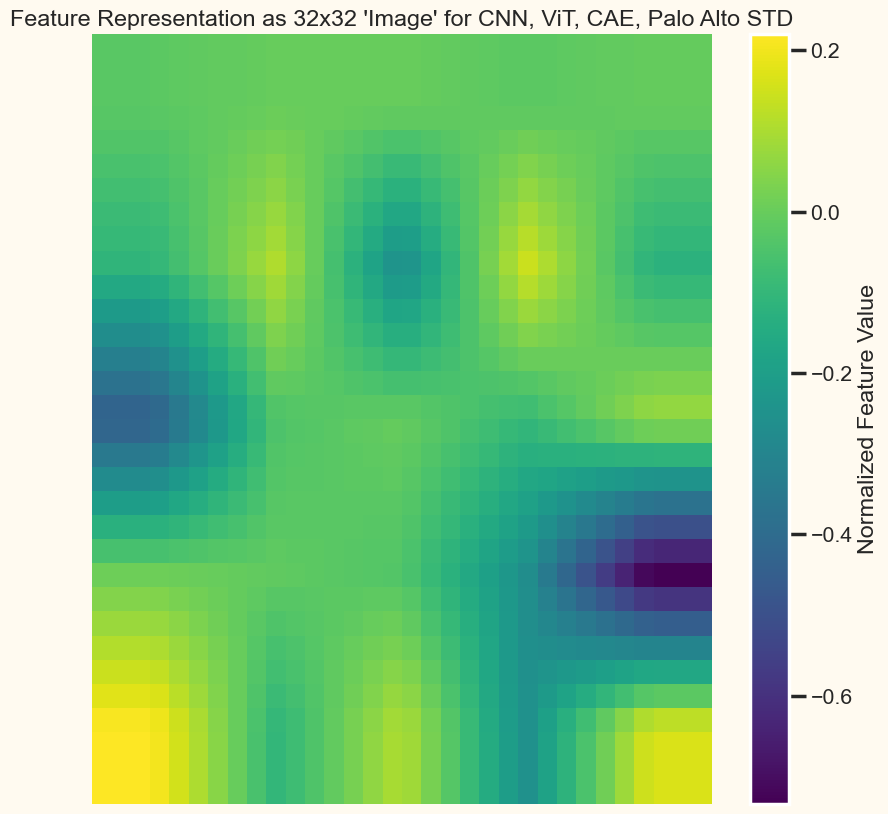

Epoch 1/35
2345/2345 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9019 - loss: 3.1763 - val_accuracy: 0.9352 - val_loss: 0.4524
Epoch 2/35
2345/2345 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9453 - loss: 0.3105 - val_accuracy: 0.9498 - val_loss: 0.1579
Epoch 3/35
2345/2345 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9513 - loss: 0.1550 - val_accuracy: 0.9542 - val_loss: 0.1493
Epoch 4/35
2345/2345 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9520 - loss: 0.1966 - val_accuracy: 0.9535 - val_loss: 0.1719
Epoch 5/35
2345/2345 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9546 - loss: 0.1508 - val_accuracy: 0.9551 - val_loss: 0.1451
Epoch 6/35
2345/2345 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9556 - loss: 0.1405 - val_accuracy: 0.9553 - val_loss: 0.1532
Epoch 7/35
2345/2345 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9562 - loss: 0.1425 - val_accuracy: 0.9571 - val_loss: 0.1371
Epoch 8/35
2345/2345 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9564 - loss: 0

In [ ]:
# Filter out class 3
y_filtered = y_filtered
X_filtered = x_filtered

# 3. Alternative feature processing (better than arbitrary reshaping)
# Normalize features
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_filtered)

# 4. Convert target to one-hot encoding for multi-class classification
num_classes = len(np.unique(y_filtered))
y_categorical = to_categorical(y_filtered, num_classes=num_classes)

# Reshape to 6x7 "images" with channel dimension
X_reshaped = X_scaled.reshape(-1, 5, 5, 1)  # Add channel dimension

# Resize all images to 32x32 and convert to NumPy array
X_resized_np = tf.image.resize(X_reshaped, [32, 32], method='bilinear').numpy()

# to see data Image ===========================================================>
# Get the first sample
sample = X_resized_np[0].squeeze()  # Remove channel dimension

# Create plot
plt.figure(figsize=(10, 10))
plt.imshow(sample, cmap='viridis', aspect='auto')
plt.title("Feature Representation as 32x32 'Image' for CNN, ViT, CAE, Palo Alto STD")
# plt.xlabel("Feature Columns (0-4)")
# plt.ylabel("Feature Rows (0-4)")
plt.colorbar(label='Normalized Feature Value')

# Annotate with feature indices
for row in range(32):
    for col in range(32):
        feature_idx = row * 32 + col
        # value = sample[row, col]
        # text_color = 'white' if value < 0.5 else 'black'
        # plt.text(col, row, f'{feature_idx}',
        #          ha='center', va='center',
        #          color=text_color, fontsize=9)

plt.axis('off')
plt.show()

# Print corresponding feature names
# print("\nCorresponding Feature Names:")
# for i, name in enumerate(X.columns):
#     print(f"{i}: {name}")
# Endd ===================================================================================>


# 4. Split data
X_train, X_test, y_train, y_test = train_test_split(X_resized_np, y_categorical, test_size=0.2, random_state=42, stratify=y_categorical)

# model = Sequential([
#     Conv2D(32, (2, 2), activation='relu', input_shape=(5, 5, 1)),
#     MaxPooling2D((1, 2)),  # Only pool vertically
#     Conv2D(64, (2, 2), activation='relu'),
#     Flatten(),
#     Dense(128, activation='relu'),
#     Dropout(0.5),
#     Dense(num_classes, activation='softmax')
# ])

# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])
# history = model.fit(X_train, y_train,
#                     epochs=30,
#                     batch_size=32,
#                     validation_split=0.2)

from tensorflow.keras import models, layers

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,1)), # Corrected input shape
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Corrected number of output units
])

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy', # Corrected loss function
              metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=35, # Corrected variable names
                    batch_size=32, validation_data=(X_test, y_test))


# OUTPUT
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Make predictions
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

# Convert y_test back to 1D if it's one-hot encoded
if y_test.ndim > 1:
    y_test = np.argmax(y_test, axis=1)

# Print detailed classification report
print("=== Detailed Classification Report ===")
print(classification_report(y_test, y_pred, digits=4, zero_division=0, target_names=[f'Class {i}' for i in range(num_classes)]))

# Print confusion matrix
print("\n=== Confusion Matrix ===")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# **ViT**

In [ ]:
from tensorflow.keras.layers import Input, Dense, LayerNormalization, MultiHeadAttention, Add, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.utils import to_categorical

# Filter out class 3
y_filtered = y_filtered
X_filtered = x_filtered

# 3. Alternative feature processing (better than arbitrary reshaping)
# Normalize features
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_filtered)

# 4. Convert target to one-hot encoding for multi-class classification
num_classes = len(np.unique(y_filtered))
y_categorical = to_categorical(y_filtered, num_classes=num_classes)

# Reshape to 6x7 "images" with channel dimension
X_reshaped = X_scaled.reshape(-1, 5, 5, 1)  # Add channel dimension

# Resize all images to 32x32 and convert to NumPy array
X_resized_np = tf.image.resize(X_reshaped, [32, 32], method='bilinear').numpy()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resized_np, y_categorical, test_size=0.2, random_state=42)

# 2. ViT Parameters
patch_size = (2, 2)  # Divide 6x7 image into 2x2 patches
num_patches = (32 // patch_size[0]) * (32 // patch_size[1])
projection_dim = 64
num_heads = 4
transformer_layers = 4
mlp_head_units = [128, 64]  # Units for final MLP

# 3. Patch Extraction Layer
class Patches(tf.keras.layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size[0], self.patch_size[1], 1],
            strides=[1, self.patch_size[0], self.patch_size[1], 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

# 4. Patch Encoding Layer (Patch + Position Embeddings)
class PatchEncoder(tf.keras.layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = Dense(projection_dim)
        self.position_embedding = tf.keras.layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

# 5. Transformer Block
def transformer_block(x, num_heads, projection_dim):
    # Layer normalization 1
    x1 = LayerNormalization(epsilon=1e-6)(x)

    # Create attention layer
    attention_output = MultiHeadAttention(
        num_heads=num_heads, key_dim=projection_dim//num_heads
    )(x1, x1)

    # Skip connection 1
    x2 = Add()([attention_output, x])

    # Layer normalization 2
    x3 = LayerNormalization(epsilon=1e-6)(x2)

    # MLP
    x3 = Dense(projection_dim * 2, activation="gelu")(x3)
    x3 = Dense(projection_dim)(x3)

    # Skip connection 2
    outputs = Add()([x3, x2])
    return outputs

# 6. Build ViT Model
def build_vit_model(input_shape, patch_size, num_patches, projection_dim, num_heads, transformer_layers, num_classes):
    inputs = Input(shape=input_shape)

    # Create patches
    patches = Patches(patch_size)(inputs)

    # Encode patches
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Transformer blocks
    x = encoded_patches
    for _ in range(transformer_layers):
        x = transformer_block(x, num_heads, projection_dim)

    # Classification head
    x = LayerNormalization(epsilon=1e-6)(x)
    x = Flatten()(x)
    x = Dense(mlp_head_units[0], activation="gelu")(x)
    x = Dense(mlp_head_units[1], activation="gelu")(x)
    outputs = Dense(num_classes, activation="softmax")(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# 7. Create and compile model
vit_model = build_vit_model(
    input_shape=(32, 32, 1),
    patch_size=patch_size,
    num_patches=num_patches,
    projection_dim=projection_dim,
    num_heads=num_heads,
    transformer_layers=transformer_layers,
    num_classes=len(np.unique(y_filtered)) # change
)

vit_model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy', # Corrected loss function
    metrics=['accuracy']
)

# 8. Train the model
history = vit_model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=20,
    validation_split=0.2,
    # class_weight=class_weights  # Use your computed class weights
)

# 9. Evaluate
test_loss, test_acc = vit_model.evaluate(X_test, y_test)

# Get predictions
y_pred = vit_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert y_test back to 1D if it's one-hot encoded
if y_test.ndim > 1:
    y_test = np.argmax(y_test, axis=1)

# Calculate F1 scores for all classes
f1_scores = f1_score(y_test, y_pred_classes, average=None)  # This gives F1 for each class
macro_f1 = f1_score(y_test, y_pred_classes, average='macro')  # Average F1 across classes

print(f"Test Accuracy: {test_acc:.4f}")
print("Per-class F1 Scores:")
for i, score in enumerate(f1_scores):
    print(f"  Class {i}: {score:.4f}")
print(f"Macro-average F1 Score: {macro_f1:.4f}")

# For detailed metrics including precision/recall for each class
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, digits=4))

Epoch 1/20
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 423s 222ms/step - accuracy: 0.9408 - loss: 0.1846 - val_accuracy: 0.9590 - val_loss: 0.1383
Epoch 2/20
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 360s 192ms/step - accuracy: 0.9529 - loss: 0.1457 - val_accuracy: 0.9548 - val_loss: 0.1352
Epoch 3/20
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 352s 188ms/step - accuracy: 0.9557 - loss: 0.1364 - val_accuracy: 0.9589 - val_loss: 0.1316
Epoch 4/20
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 354s 189ms/step - accuracy: 0.9573 - loss: 0.1312 - val_accuracy: 0.9600 - val_loss: 0.1257
Epoch 5/20
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 350s 187ms/step - accuracy: 0.9581 - loss: 0.1264 - val_accuracy: 0.9600 - val_loss: 0.1253
Epoch 6/20
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 361s 193ms/step - accuracy: 0.9587 - loss: 0.1245 - val_accuracy: 0.9606 - val_loss: 0.1210
Epoch 7/20
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 370s 197ms/step - accuracy: 0.9594 - loss: 0.1210 - val_accuracy: 0.9603 - val_loss: 0.1254
Epoch 8/20
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 373s 199ms/step - ac

# **EfficientNetV2**

In [ ]:
from tensorflow.keras.layers import Input, Dense, LayerNormalization, MultiHeadAttention, Add, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers
from tensorflow.keras.applications import EfficientNetV2B0 # Import EfficientNetV2B0
import matplotlib.pyplot as plt
import seaborn as sns


# Filter out class 3
y_encoded = y_filtered
X_filtered = x_filtered

# 3. Alternative feature processing (better than arbitrary reshaping)
# Normalize features
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_filtered)

# 4. Convert target to one-hot encoding for multi-class classification
num_classes = len(np.unique(y_encoded))
# y_categorical = to_categorical(y_filtered, num_classes=num_classes) # Keep integer target for sparse_categorical_crossentropy

# Reshape data to 42x1 (treat as 1-channel "image")
X_reshaped = X_scaled.reshape(-1, 42, 1, 1)  # New shape: (samples, 42, 1, 1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_reshaped, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Preprocessing function (applied only once)
def preprocess_for_effnet(x):
    x = tf.image.resize(x, [48, 48])  # Resize to 48x48
    x = tf.repeat(x, 3, axis=-1)      # Replicate channels (1->3)
    return x

# Create TensorFlow dataset
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

# Apply preprocessing ONLY in dataset pipeline
train_dataset = train_dataset.map(
    lambda x, y: (preprocess_for_effnet(x), y),
    num_parallel_calls=tf.data.AUTOTUNE
)
test_dataset = test_dataset.map(
    lambda x, y: (preprocess_for_effnet(x), y),
    num_parallel_calls=tf.data.AUTOTUNE
)

# to see data Image ===========================================================>
# Get the first sample using an iterator
for sample, label in train_dataset.take(1):
  sample = sample.numpy().squeeze() # Convert to numpy and remove channel dimension

# Create plot
plt.figure(figsize=(10, 8))
plt.imshow(sample, cmap='viridis', aspect='auto')
plt.title("Feature Representation as 48x48 'Image' of EfficientNetV2")
plt.xlabel("Feature Columns")
plt.ylabel("Feature Rows")
plt.colorbar(label='Normalized Feature Value')
plt.show()

# Print corresponding feature names - Note: Feature names don't directly map to pixels after resizing
print("\nCorresponding Feature Names (Original 42 features):")
for i, name in enumerate(X.columns):
    print(f"{i}: {name}")

# Batch and prefetch
batch_size = 64
train_dataset = train_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Build model with corrected input shape
def create_model():
    base_model = EfficientNetV2B0(
        include_top=False,
        weights=None,
        input_shape=(48, 48, 3),  # Directly use preprocessed shape
        pooling='avg'
    )

    model = models.Sequential([
        base_model,
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

model = create_model()
model.summary()

# Calculate class weights
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))

# Train the model
epochs = 20
history = model.fit(
    train_dataset,
    epochs=epochs,
    validation_data=test_dataset,
    class_weight=class_weights
)

# Evaluate
test_loss, test_acc = model.evaluate(test_dataset)
print(f"\nTest Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

NameError: name 'y_filtered' is not defined